In [17]:
#importing the supporting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
#Get in the dataset
df=pd.read_csv('titanic.csv')

In [19]:
#Having a reference of the attributes to go back to
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
#Have an overview of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
#To check and confirm if any column is empty
df.Pclass.isnull().sum()
df.Sex.isnull().sum()

0

In [26]:
#Finding number of missing values in Age attribute from the df.info
df.Age.isnull().sum()

177

In [27]:
#Handling the missing values in the Age attribute from the insights we get from df.info
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [28]:
# Check that No NANs in Df['Age']
df.Age.isnull().sum()

0

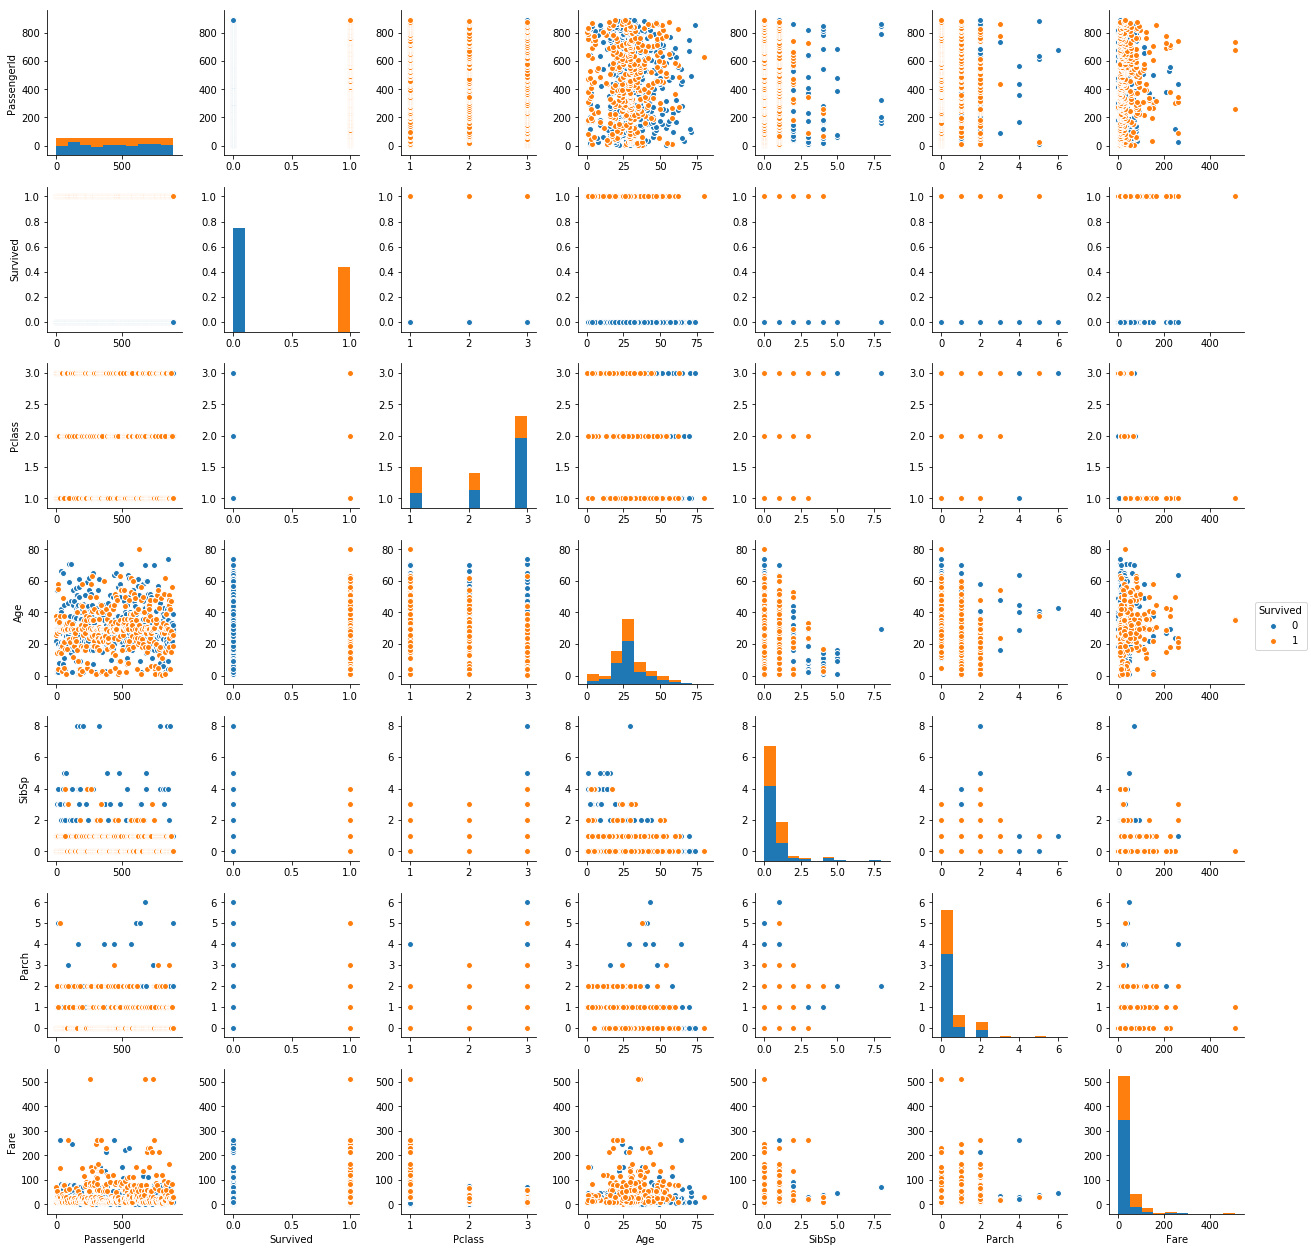

In [29]:
#Plotting pairplots between relationships amongst the variables in the dataset
sns.pairplot(df,hue='Survived')

In [11]:
#dictionary mapping categorical values to int values to be able to work on that attribute
d={'male':0,'female':1}
df['Sex']=df['Sex'].apply(lambda x:d[x])

In [13]:
#X is set of sets: Only the columns contributing to the prediction of Survival
X=df[['Pclass','Age','Sex','Fare']]
X.head()

,Pclass,Age,Sex,Fare
0,3,22.0,0,7.2500
1,1,38.0,1,71.2833
2,3,26.0,1,7.9250
3,1,35.0,1,53.1000
4,3,35.0,0,8.0500


In [30]:
#Now we have our outcome variable
Y=df['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
#importing Logistic Regression model from scikitlearn
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#Random state assignment is to maintain consistency of splitted dataset over multiple iterations
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=34)

In [34]:
myLRmodel=LogisticRegression(random_state=34)

In [35]:
#Fitting the Logistic regression model to input attributes producing outcome predictions
myLRmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=34, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
predict=myLRmodel.predict(X_test)

In [37]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [38]:
#But we need the score accuracy and not these predicted values
myLRmodel.score(X_test,Y_test)

0.80269058295964124

In [39]:
#This gives us 80.2% accuracy
from sklearn.metrics import classification_report
Y_pred=myLRmodel.predict(X_test)

In [40]:
#PRecision & Recall
#precision=tp/tp+fp true positive,false positive --> estimated person dead but person alive
#recall=tp/tp+fn true positive,false negative --> estimated person didnt die but he was dead
print(classification_report(Y_test,Y_pred))


             precision    recall  f1-score   support

          0       0.83      0.86      0.84       138
          1       0.76      0.71      0.73        85

avg / total       0.80      0.80      0.80       223



In [41]:
#Model 2: Running the same analysis using Support-Vector-Machines to compare the score of accuracy
from sklearn import svm

In [42]:
SVMmodel=svm.LinearSVC(random_state=34)

In [43]:
SVMmodel.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=34, tol=0.0001,
     verbose=0)

In [44]:
SVMmodel.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [45]:
SVMmodel.score(X_test,Y_test)

0.81614349775784756

In [46]:
#This gives us 81.6% accuracy

In [47]:
from sklearn.metrics import classification_report
Y_predsvm=SVMmodel.predict(X_test)

In [48]:
print(classification_report(Y_test,Y_predsvm))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       138
          1       0.80      0.69      0.74        85

avg / total       0.81      0.82      0.81       223



In [49]:
#Hence we can conclude that SVM is more accurate than Logistic Regression Model